In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sales=pd.read_csv('SuperMart Sales.csv')

### End to End ML cycle

Problem Statemnt-- What is the problem and what we are trying to achieve from that

1. Univariate Analysis-- Analysing the features single handedly

2. Bivariate Anlysis-- Predictor variables vs Target variable

3. Missing Values and their imputations

4. Outlier Treatmens-- Z-Score or IQR

5. Feature Enginerring

       * Feature Extraction
       * Transformation such as Log,Sqrt
       * Scaling - Min Max Scalar, Zscore based scalar (Standard scalar)

In [7]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


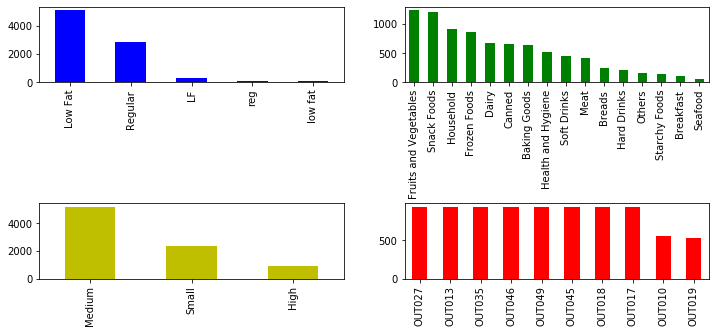

In [30]:
# Univariate analysis -- Categorical variable

fig,axes=plt.subplots(2,2,figsize=[12,5])

plt.subplots_adjust(hspace=1.6)  # space between plot gets adjusted

sales.Item_Fat_Content.value_counts().plot(kind='bar',ax=axes[0][0],color='b')

sales.Item_Type.value_counts().plot(kind='bar',ax=axes[0][1],color='g')

sales.Outlet_Size.value_counts().plot(kind='bar',ax=axes[1][0],color='y')

sales.Outlet_Identifier.value_counts().plot(kind='bar',ax=axes[1][1],color='r')

plt.show()


### Conclusion

1. Plot1: More low fat items in comparison to regular.

2. Plot2: Fruits and vegetables, Snacks, Households , Frozen food ,Dairy are the most selling items.

3. Plot3: Medium size outlets are more in number.

4. Plot4: Out10 and Out9 are the bad performing outlets

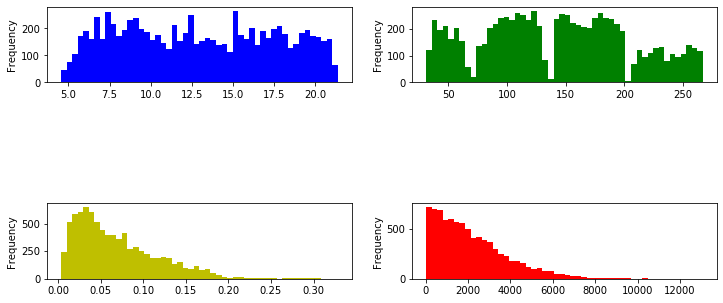

In [29]:
# Histograms

fig,axes=plt.subplots(2,2,figsize=[12,5])

plt.subplots_adjust(hspace=1.6)  # space between plot gets adjusted

sales.Item_Weight.plot(kind='hist',ax=axes[0][0],color='b',bins=50)

sales.Item_MRP.plot(kind='hist',ax=axes[0][1],color='g',bins=50)

sales.Item_Visibility.plot(kind='hist',ax=axes[1][0],color='y',bins=50)

sales.Item_Outlet_Sales.plot(kind='hist',ax=axes[1][1],color='r',bins=50)

plt.show()

### Conclusion

1. Plot1: Item Weight shows uniformity in terms of data spread.

2. Plot2: Item MRP has 4 data distribution.

3. Plot3: Item Visibility is skewed.

4. Plot4: Item outlet sales is skewed.

In [31]:
# Rectifying Item_fat_contents

sales.Item_Fat_Content.replace(to_replace = ["LF","low fat"],value = ["Low Fat"]*2, inplace = True)

sales.Item_Fat_Content.replace(to_replace = ["reg"],value = ["Regular"], inplace = True)


In [32]:
sales.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

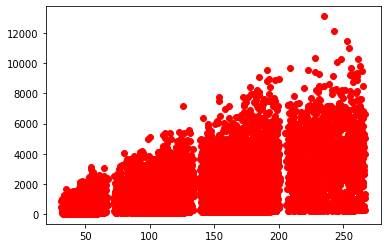

In [36]:
# Bivariate -Item Mrp vs Sales

plt.scatter(sales.Item_MRP,sales.Item_Outlet_Sales,color='r')
plt.show()

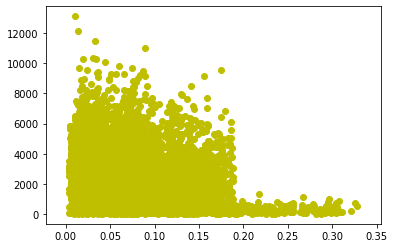

In [38]:
# Bivariate -Item visibility vs Sales

plt.scatter(sales.Item_Visibility,sales.Item_Outlet_Sales,color='y')
plt.show()

# High visible items are selling less when compared to low visible items like fruits and veg

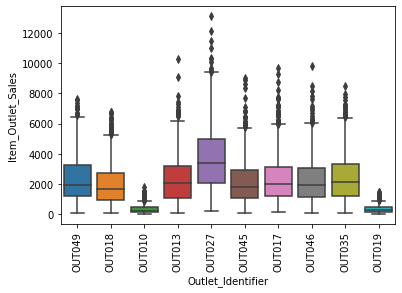

In [40]:
# Categorical with target variable


sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=90)
plt.show()

In [45]:
sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].describe().T

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
count,555.000000,932.000000,926.000000,928.000000,528.000000,935.000000,930.000000,929.000000,930.000000,930.000000
mean,339.351662,2298.995256,2340.675263,1995.498739,340.329723,3694.038558,2438.841866,2192.384798,2277.844267,2348.354635
std,271.014855,1533.531664,1550.778025,1375.932889,249.979449,2127.760054,1538.512533,1462.399658,1488.405631,1513.289464
min,33.290000,73.238000,143.812800,69.243200,33.955800,241.685400,113.851800,99.870000,101.867400,111.854400
25%,154.132700,1072.603800,1195.943250,981.555650,153.633350,2044.338900,1238.887350,1068.609000,1137.186400,1182.793700
50%,250.340800,2050.664000,2005.056700,1655.178800,265.321300,3364.953200,2109.254400,1834.944800,1945.800500,1966.107400
75%,455.407200,3166.378350,3096.469350,2702.648650,460.733600,4975.523400,3310.357600,2929.520000,3095.637100,3281.728200
max,1775.688600,10256.649000,9664.752800,6768.522800,1482.070800,13086.964800,8479.628800,8994.958000,9779.936200,7646.047200


### Feature Engineering

In [46]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [60]:
sales.Item_Identifier[0][:2]

'FD'

In [61]:
items=[]
for i in sales.Item_Identifier:
    items.append(i[:2])

In [66]:
# Extracted 1st Feature

sales['Item_Category']=pd.Series(items)

In [67]:
# Where NC is seen, Make Item Fat content as Non Edible

sales.loc[sales.Item_Category=='NC','Item_Fat_Content']='Non Edible'

In [68]:
sales.Item_Fat_Content.value_counts()

Low Fat       3918
Regular       3006
Non Edible    1599
Name: Item_Fat_Content, dtype: int64

In [69]:
# Item Type -Perishabel and Non Perishable

sales.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [74]:
perishables=['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast','Breads', 'Seafood']

In [77]:
sales['Item_Perish']=sales.Item_Type.apply(lambda x: 'Perishable' if x in perishables else 'Non Perishable')

In [78]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Perish
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable
4,NCD19,8.93,Non Edible,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable


In [79]:
# Outlet Identifier-- converting into two category

sales['Outlet_Identifier']=sales.Outlet_Identifier.apply(lambda x: 'OUT027' if x=='OUT027' else 'Others')

In [80]:
# 2013 data and 2013- Outlet est year-Outlet vintage

sales['Outlet_Vintage']=2013-sales.Outlet_Establishment_Year

In [81]:
# Drop the extra columns--

finalsales=sales.drop(['Item_Identifier','Item_Type','Outlet_Establishment_Year'],axis=1)

In [83]:
finalsales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Perish,Outlet_Vintage
0,9.30,Low Fat,0.016047,249.8092,Others,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,14
1,5.92,Regular,0.019278,48.2692,Others,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,4
2,17.50,Low Fat,0.016760,141.6180,Others,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,14
3,19.20,Regular,0.015274,182.0950,Others,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,15
4,8.93,Non Edible,0.008082,53.8614,Others,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,26


In [93]:
# Encoding - One hot Encoding


pd.get_dummies(finalsales.Item_Fat_Content,drop_first=True)


# when there are multiple categories, then the 3rd column output can be easily infered. Therefore we drop the column

,Non Edible,Regular
0,0,0
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
8518,0,0
8519,0,1
8520,1,0
8521,0,1


In [96]:
# concatinating with the data set

finalsales=pd.concat([finalsales,pd.get_dummies(sales.Item_Fat_Content,drop_first=True)],axis=1)

In [97]:
# Encoding - One hot Encoding


pd.get_dummies(finalsales.Outlet_Size,drop_first=True)


# when there are multiple categories, then the 3rd column output can be easily infered. Therefore we drop the column

,Medium,Small
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
8518,0,0
8519,1,0
8520,0,1
8521,1,0


In [98]:
# concatinating with the data set

finalsales=pd.concat([finalsales,pd.get_dummies(sales.Outlet_Size,drop_first=True)],axis=1)

In [99]:
finalsales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Perish,Outlet_Vintage,Non Edible,Regular,Medium,Small
0,9.30,Low Fat,0.016047,249.8092,Others,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,14,0,0,1,0
1,5.92,Regular,0.019278,48.2692,Others,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,4,0,1,1,0
2,17.50,Low Fat,0.016760,141.6180,Others,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,14,0,0,1,0
3,19.20,Regular,0.015274,182.0950,Others,Medium,Tier 3,Grocery Store,732.3800,FD,Perishable,15,0,1,1,0
4,8.93,Non Edible,0.008082,53.8614,Others,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,26,1,0,0,0


In [101]:
#dropping columns

finalsales.drop(['Item_Fat_Content','Outlet_Size'],axis=1)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category,Item_Perish,Outlet_Vintage,Non Edible,Regular,Medium,Small
0,9.300,0.016047,249.8092,Others,Tier 1,Supermarket Type1,3735.1380,FD,Perishable,14,0,0,1,0
1,5.920,0.019278,48.2692,Others,Tier 3,Supermarket Type2,443.4228,DR,Non Perishable,4,0,1,1,0
2,17.500,0.016760,141.6180,Others,Tier 1,Supermarket Type1,2097.2700,FD,Perishable,14,0,0,1,0
3,19.200,0.015274,182.0950,Others,Tier 3,Grocery Store,732.3800,FD,Perishable,15,0,1,1,0
4,8.930,0.008082,53.8614,Others,Tier 3,Supermarket Type1,994.7052,NC,Non Perishable,26,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,Others,Tier 3,Supermarket Type1,2778.3834,FD,Non Perishable,26,0,0,0,0
8519,8.380,0.046982,108.1570,Others,Tier 2,Supermarket Type1,549.2850,FD,Non Perishable,11,0,1,1,0
8520,10.600,0.035186,85.1224,Others,Tier 2,Supermarket Type1,1193.1136,NC,Non Perishable,9,1,0,0,1
8521,7.210,0.145221,103.1332,Others,Tier 3,Supermarket Type2,1845.5976,FD,Non Perishable,4,0,1,1,0


### Outlier Treatment

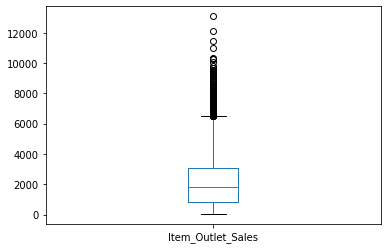

In [103]:
finalsales.Item_Outlet_Sales.plot.box()
plt.show()

In [104]:
# Boxplot --Any value > Q3+1.5*IQR is an Outlier

IQR=finalsales.Item_Outlet_Sales.quantile(0.75)-finalsales.Item_Outlet_Sales.quantile(0.25)

In [111]:
finalsales.Item_Outlet_Sales.quantile(0.75)+1.5*IQR

6501.8699

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

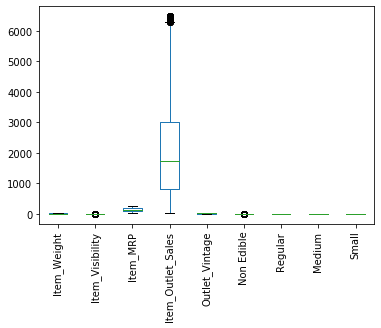

In [115]:
finalsales[finalsales.Item_Outlet_Sales<finalsales.Item_Outlet_Sales.quantile(0.75)+1.5*IQR].plot.box()
plt.xticks(rotation=90)

In [121]:
# Log Transformation and SQRT Transformation

# The purpose is to bring the data into normality.


# QQ Plot is called probability plot and it tells if the data is normal or not

# QQ Plot-- Quantile-Quantile plot


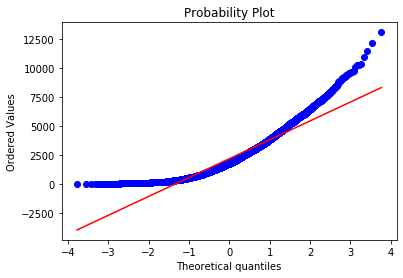

In [123]:
from scipy import stats
stats.probplot(finalsales.Item_Outlet_Sales,plot=plt)
plt.show()


# With this plot the transformation technique can be identified.


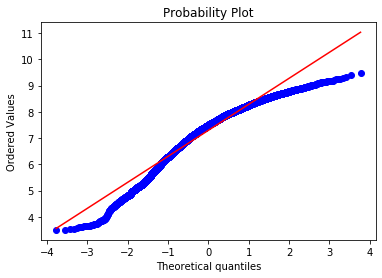

In [122]:
# log transformation

stats.probplot(np.log(finalsales.Item_Outlet_Sales),plot=plt)
plt.show()

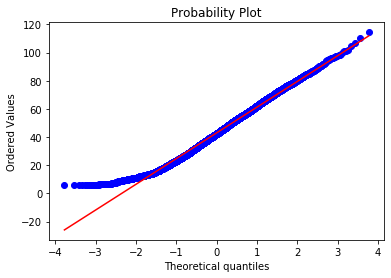

In [120]:
# sqrt transformation

stats.probplot(np.sqrt(finalsales.Item_Outlet_Sales),plot=plt)
plt.show()

# SQRT Transformation on numerical columns 